In [1]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Data Preparation

In [21]:
def get_data(file: str) -> pd.DataFrame:
    data = []
    with open(f"data\\{file}", "r") as file:
        for idx, line in enumerate(file.readlines()):
            # Skip Metadata lines
            if idx in [0, 1, 2, 3, 4, 6]:
                continue

            data.append(line)

    return pd.read_csv(StringIO("".join(data))).rename(
        columns={
            "Load (lbf)": "Load (lbs)",
        }
    )

In [22]:
brush_tests = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "5a",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
]

dataframes = {}
for brush in brush_tests:
    dataframes[brush] = get_data(f"Ankenman brushes_{brush}.txt")

In [23]:
df = (
    pd.concat(
        [df.reset_index(drop=True) for df in dataframes.values()],
        keys=dataframes.keys(),
        names=["Brush"],
    )
    .reset_index()
    .drop(columns=["level_1"])
)

df

,Brush,Time (s),Load (lbs),Crosshead (in)
0,1,0.40,0,0.000
1,1,0.60,0,0.000
2,1,0.80,0,0.000
3,1,1.00,0,0.001
4,1,1.20,0,0.001
...,...,...,...,...
19939,15,123.30,155,0.242
19940,15,123.40,155,0.242
19941,15,123.50,154,0.242
19942,15,123.60,153,0.243


In [49]:
df_load_max = df.groupby("Brush").max()[["Load (lbs)"]]
df_load_max = df_load_max.reindex(brush_tests)
df_load_max["color"] = pd.Series(
    [
        "white",
        "green",
        "white",
        "silver",
        "blue",
        "blue",
        "black",
        "green",
        "silver",
        "white",
        "green",
        "blue",
        "white",
        "silver",
        "silver",
        "black",
    ],
    index=df_load_max.index,
)

In [50]:
df_load_max = df_load_max.drop([])
df_load_max

,Load (lbs),color
Brush,,
1,216,white
2,107,green
3,152,white
4,236,silver
5,199,blue
5a,199,blue
6,127,black
7,208,green
8,232,silver


# Data Visualization

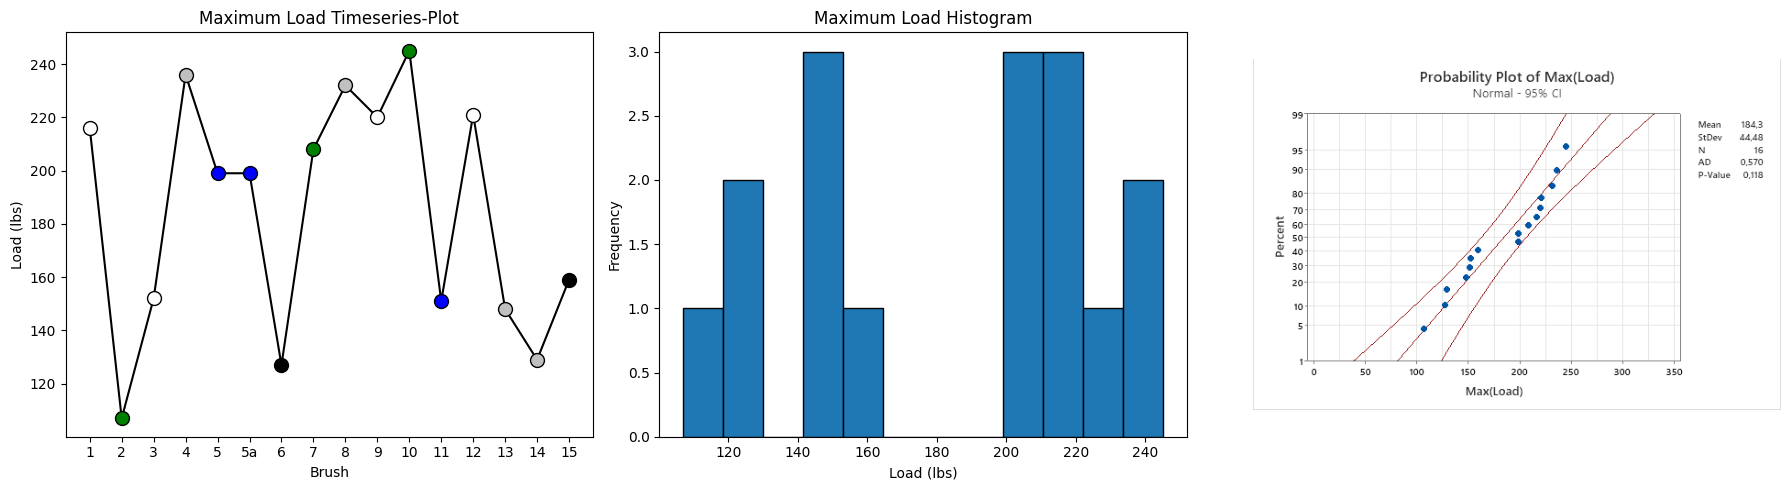

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Timeseries Line Plot
axs[0].plot(df_load_max["Load (lbs)"], color="black", zorder=0)
for row in df_load_max.itertuples():
    axs[0].scatter(row[0], row[1], color=row[2], s=100, edgecolors="black")
axs[0].set_title("Maximum Load Timeseries-Plot")
axs[0].set_xlabel("Brush")
axs[0].set_ylabel("Load (lbs)")

# Histogram
axs[1].hist(df_load_max["Load (lbs)"], bins=12, edgecolor="black")
axs[1].set_title("Maximum Load Histogram")
axs[1].set_xlabel("Load (lbs)")
axs[1].set_ylabel("Frequency")

# Probability Plot
img = mpimg.imread("images/max_load_probability_plot.png")
axs[2].imshow(img)
axs[2].axis("off")

plt.tight_layout()
plt.show()

# Sample Statistics

In [52]:
n = len(df_load_max)
sample_mean = df_load_max["Load (lbs)"].mean()
sample_median = df_load_max["Load (lbs)"].median()
sample_stddev = df_load_max["Load (lbs)"].std()

print(f"Sample Size:\t{n}")
print(f"Sample Mean:\t{sample_mean:.2f} lbs")
print(f"Sample Median:\t{sample_median:.2f} lbs")
print(f"Sample Stddev:\t{sample_stddev:.2f} lbs")

Sample Size:	16
Sample Mean:	184.31 lbs
Sample Median:	199.00 lbs
Sample Stddev:	44.48 lbs
